In [1]:
import numpy as np
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [2]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [3]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [4]:
print(train.shape,test.shape)

(1459, 11) (715, 10)


In [5]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
train.corr() #온도,풍속,오존,가시성이 긍정적 영향,습도&비&미세먼지는 부정적 영향

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


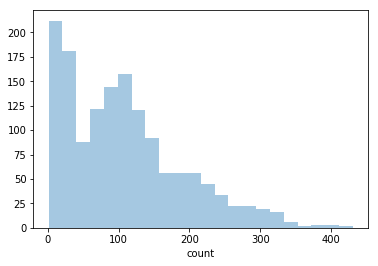

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['count'],kde=False)

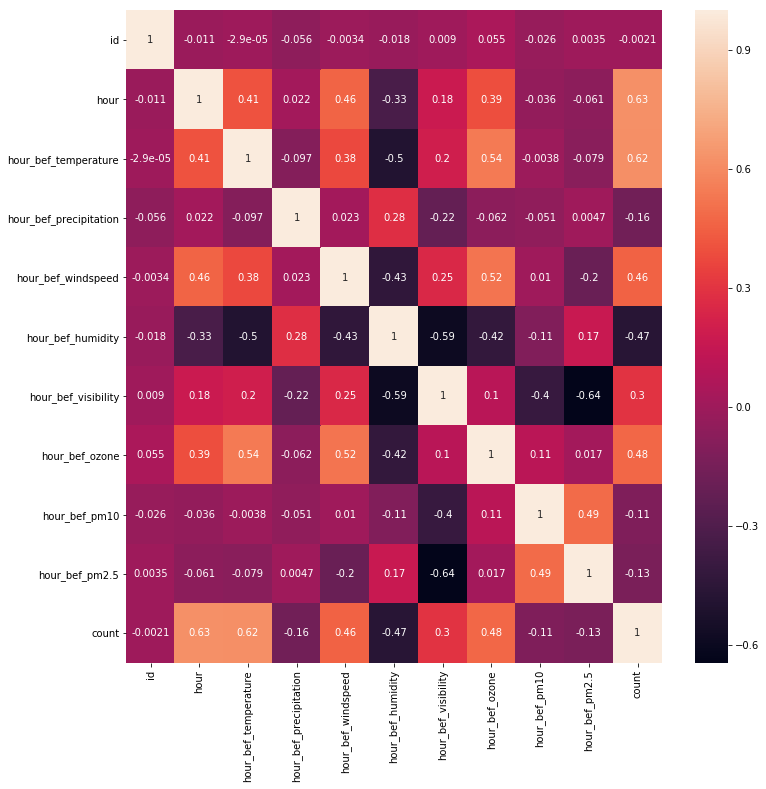

In [9]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(),annot=True)

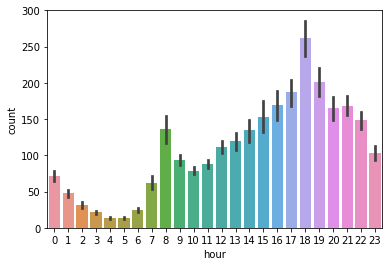

In [10]:
sns.barplot(x='hour',y='count',data=train)

In [11]:
y_train=train['count']
x_train=train.drop(['count','id'],axis=1)
x_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [12]:
x_train[x_train['hour_bef_temperature'].isnull()] 
#hour_bef_temperature,hour_bef_precipitation같은 경우에는 hour 제외하고 모두 다 NaN 상태
#hour_bef_humidity,hour_bef_visibility같은 경우에도 마찬가지

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
934,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
x_train[(x_train['hour_bef_ozone'].isnull())]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
14,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN
44,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0
46,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN
84,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN
122,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0
140,10,18.2,0.0,2.4,60.0,527.0,NaN,NaN,NaN
142,1,18.8,0.0,1.1,61.0,2000.0,NaN,NaN,NaN
147,1,18.4,0.0,3.1,31.0,2000.0,NaN,NaN,NaN
158,1,15.3,0.0,1.4,77.0,1542.0,NaN,NaN,NaN
176,1,8.8,0.0,3.6,62.0,1997.0,NaN,NaN,NaN


In [14]:
x_train.loc[(x_train['hour_bef_pm10'].isnull())].head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
14,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN
46,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN
84,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN
100,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN
129,19,27.0,0.0,3.6,39.0,2000.0,0.047,NaN,NaN


In [15]:
x_train[(x_train['hour_bef_pm2.5'].isnull())].head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
14,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN
33,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN
46,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN
84,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN
100,16,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN


In [16]:
x_train.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000
mean,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124
std,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000
25%,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000
50%,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000
75%,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000


### 결측치 채우기

In [19]:
## 보간법
x_train.interpolate(inplace=True)

In [20]:
x_train.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

### 결측치 다른 방법으로 채우기

In [17]:
##다른 방법
x_train.fillna({'hour_bef_temperature':int(x_train['hour_bef_temperature'].mean())},
              inplace=True)

In [18]:
x_train['hour_bef_precipitation'].fillna(x_train['hour_bef_precipitation'].mean(),inplace=True)
x_train['hour_bef_windspeed'].fillna(x_train['hour_bef_windspeed'].mean(),inplace=True)
x_train['hour_bef_visibility'].fillna(x_train['hour_bef_visibility'].mean(),inplace=True)
x_train['hour_bef_ozone'].fillna(x_train['hour_bef_ozone'].mean(),inplace=True)

In [19]:
x_train['hour_bef_humidity'].fillna(x_train['hour_bef_humidity'].mean(),inplace=True)
x_train['hour_bef_pm10'].fillna(x_train['hour_bef_pm10'].mean(),inplace=True)
x_train['hour_bef_pm2.5'].fillna(x_train['hour_bef_pm2.5'].mean(),inplace=True)

In [20]:
x_train.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [21]:
x_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0


In [22]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [23]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
id                        715 non-null int64
hour                      715 non-null int64
hour_bef_temperature      714 non-null float64
hour_bef_precipitation    714 non-null float64
hour_bef_windspeed        714 non-null float64
hour_bef_humidity         714 non-null float64
hour_bef_visibility       714 non-null float64
hour_bef_ozone            680 non-null float64
hour_bef_pm10             678 non-null float64
hour_bef_pm2.5            679 non-null float64
dtypes: float64(8), int64(2)
memory usage: 55.9 KB


In [26]:
## 결측치 채우기
test.interpolate(inplace=True)

In [25]:
test.fillna({'hour_bef_temperature':int(test['hour_bef_temperature'].mean())}
            ,inplace=True)
test['hour_bef_precipitation'].fillna(test['hour_bef_precipitation'].mean(),inplace=True)
test['hour_bef_windspeed'].fillna(test['hour_bef_windspeed'].mean(),inplace=True)
test['hour_bef_humidity'].fillna(test['hour_bef_humidity'].mean(),inplace=True)
test['hour_bef_visibility'].fillna(test['hour_bef_visibility'].mean(),inplace=True)
test['hour_bef_ozone'].fillna(test['hour_bef_ozone'].mean(),inplace=True)
test['hour_bef_pm10'].fillna(test['hour_bef_pm10'].mean(),inplace=True)
test['hour_bef_pm2.5'].fillna(test['hour_bef_pm2.5'].mean(),inplace=True)

In [27]:
x_test=test.drop(['id'],axis=1)
x_test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [28]:
x_test.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [28]:
train['count'].groupby(train['hour_bef_precipitation']).sum() #0이 제일 많음

hour_bef_precipitation
0.0    156805.0
1.0      1549.0
Name: count, dtype: float64

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model=RandomForestRegressor(criterion='mse')
model.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
x_train.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [32]:
model.feature_importances_ #모델 중요도
#hour,hour_bef_temperature,hour_bef_humidity,hour_bef_visibility,
#hour_bef_ozone,hour_bef_pm10가 중요도가 높은 편

array([0.59292058, 0.18717075, 0.01987598, 0.02829793, 0.03929219,
       0.03536819, 0.03817116, 0.03629261, 0.02261062])

In [33]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor(criterion='mse',random_state=2021)
params={'n_estimators':[200,300,500,1000],
       'max_features':[5,6,8,10],
       'min_samples_leaf':[1,3,5,7]}
greedy_CV=GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1)
#n_jobs=-1은 모든 프로세서 사용
greedy_CV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=2021),
             n_jobs=-1,
             param_grid={'max_features': [5, 6, 8, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [200, 300, 500, 1000]})

In [34]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [35]:
submission['count']=greedy_CV.predict(x_test)

In [36]:
submission.to_csv('greedy_CV.csv',index=False)

In [37]:
import xgboost
xgb=xgboost.XGBRegressor(n_estimators=1000,learning_rate=0.01,gamma=0,
        subsample=0.75,colsample_bytree=1,max_depth=7)

In [38]:
xgb.fit(x_train,y_train)

C:\Users\zzang\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\zzang\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.75)

In [39]:
predictions=xgb.predict(x_test)

In [43]:
submit=submission.copy()
submit.head()

,id,count
0,0,103.600000
1,1,215.523333
2,2,83.020000
3,4,35.463333
4,5,68.540000


In [46]:
submit['count']=predictions
submit.to_csv('bicycle_xgb.csv',index=False)

In [47]:
submit.head()

,id,count
0,0,108.720879
1,1,187.415070
2,2,59.782242
3,4,36.271442
4,5,49.022690


In [50]:
## 불필요한 변수 제거
#hour,hour_bef_temperature,hour_bef_humidity,hour_bef_visibility,
#hour_bef_ozone,hour_bef_pm10가 중요도가 높은 편
df_x=x_train.loc[:,['hour','hour_bef_temperature','hour_bef_humidity','hour_bef_visibility',
'hour_bef_ozone','hour_bef_pm10']]

In [51]:
tf_x=x_test.loc[:,['hour','hour_bef_temperature','hour_bef_humidity','hour_bef_visibility',
'hour_bef_ozone','hour_bef_pm10']]

In [52]:
xgb.fit(df_x,y_train)

[18:35:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.75)

In [53]:
submit['count']=xgb.predict(tf_x)
submit.head()

,id,count
0,0,116.104889
1,1,190.506256
2,2,81.473763
3,4,27.833885
4,5,34.377384


In [55]:
submit.to_csv('xgb_features_removed.csv',index=False)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [18]:
model_dict={'dt':DecisionTreeRegressor(),
           'rf':RandomForestRegressor(),
           'lgb':lgb.LGBMRegressor(),
           'xgb':xgb.XGBRegressor(),
           'knn':KNeighborsRegressor()}

In [19]:
from sklearn.model_selection import KFold
k_fold=KFold(n_splits=5,shuffle=True,random_state=10)
from sklearn.model_selection import cross_val_score

In [20]:
score={}
for model_name in model_dict.keys():
    model=model_dict[model_name]
    score[model_name]=np.mean(cross_val_score(model,x_train, y_train, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = k_fold))

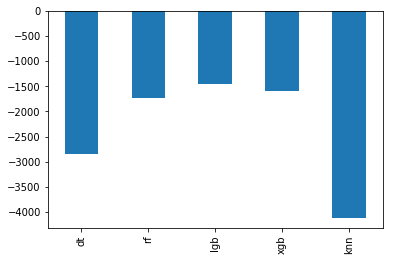

In [21]:
pd.Series(score).plot(kind='bar')

In [27]:
score

{'dt': -2846.653405827802,
 'rf': -1734.1320452619686,
 'lgb': -1459.1063573548472,
 'xgb': -1596.9389178327078,
 'knn': -4117.225244739443}

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [23]:
from sklearn.model_selection import train_test_split
x_trn,x_val,y_trn,y_val=train_test_split(x_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)
kfolds=KFold(n_splits=10,shuffle=True,random_state=10)

In [ ]:
scores=0
for idx_trn,idx_val in kfolds.split(train_tfs):

In [24]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
count_predicted=forest.predict(x_test)
count_predicted

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 74.6, 215.6,  91.7,  32.5,  56.9, 130.4, 215.1, 349.9,  40.8,
       110.4, 313.8, 270.6, 113.1,  46.6, 219.4, 143.4,  27.1, 165.1,
       388.3, 168. , 241.7,  73.1,  14.5, 135.4, 140.1, 128.5,  24.7,
       111.4, 115.5, 157.7,  67.5,  29.9,  73.1, 131.5, 248.1,  29.6,
       159.2, 129.1, 207.5,  90.1,  42.1, 130.2, 134.2,  86.4, 336.3,
       164.6,  83.2,  64.3,  16.8,  85.6, 231.5,  90.9, 170.8,  92.3,
       165.1, 134.9,  48.4, 177. ,  14.6,  19.3,  78.4,  99.2, 272.5,
       322.7, 139.1, 315.5,  16.2, 217.2, 140.7,  32.7, 117.2,  28.5,
       104.4,  14.6, 344.5, 211.4,  39.1, 207.8, 213.8,  18.7, 237.1,
       122.5,  62.8,  83.7, 113.7, 308.4,  54.1, 167.5,  93.4, 309.7,
       297.9, 154.1,  73.5, 110.3,  37.5,  65. ,  77.3,  25.1, 219. ,
       125.6,  14.6, 133.5,  42.7, 124.1,  68.7,  61.8,  99.9,  17.5,
       166.5, 118.3, 164.8, 183.9, 164.8, 135. ,  75.2, 147.6, 252.6,
        35.2, 178.7,  15.3, 111.4, 102.8, 160.6, 114.6,  47.3, 122.1,
        53.9,  16.3,